# Start of program

In [1]:
from functions import *
#from get_field import *
import numpy as np
import matplotlib.pyplot as plt

Input:

In [23]:
# Code should run for how many loops:
run_time = 5
# Between how many ped should be added per timestamp
ped_add_min = 1
ped_add_max = 5


In [24]:
ped_list = []
plotting_list = []

In [26]:
for t in range(0, run_time):
    ped_list = generate_ped(ped_list, ped_add_min, ped_add_max)
    if t == 0:
        first_ped = ped_list
    plotting_list.append(ped_list)
    field_list = get_field(ped_list)
    for ped in range(0, len(ped_list)):
        probabilities = get_prob(ped_list, ped, field_list)
        decided_square = make_decision(probabilities)
        move_ped(ped_list, ped, decided_square)
    print(ped_list)
        

[[[9, 75], [9, 2]], [[20, 9], [14, 3]], [[10, 137], [12, 1]], [[12, 45], [3, 5]], [[5, 10], [15, 7]], [[19, 10], [10, 3]], [[20, 83], [6, 1]], [[11, 125], [10, 3]], [[20, 94], [6, 3]], [[10, 50], [11, 2]], [[6, 126], [8, 1]], [[14, 11], [12, 0]], [[8, 1], [13, 3]], [[10, 78], [6, 1]], [[1, 108], [8, 2]], [[7, 126], [11, 3]], [[19, 99], [10, 1]]]
[[[9, 75], [8, 1]], [[20, 9], [14, 4]], [[10, 137], [11, 0]], [[12, 45], [2, 6]], [[5, 10], [14, 8]], [[19, 10], [9, 4]], [[20, 83], [5, 2]], [[11, 125], [9, 3]], [[20, 94], [5, 4]], [[10, 50], [10, 2]], [[6, 126], [8, 0]], [[14, 11], [12, 1]], [[8, 1], [13, 2]], [[10, 78], [6, 0]], [[1, 108], [7, 2]], [[7, 126], [10, 3]], [[19, 99], [9, 0]], [[1, 47], [6, 1]], [[11, 136], [8, 1]], [[13, 107], [12, 1]], [[8, 31], [12, 3]]]
[[[9, 75], [8, 1]], [[20, 9], [13, 4]], [[10, 137], [10, 1]], [[12, 45], [3, 7]], [[5, 10], [13, 9]], [[19, 10], [9, 5]], [[20, 83], [6, 3]], [[11, 125], [10, 4]], [[20, 94], [4, 5]], [[10, 50], [11, 1]], [[6, 126], [8, 1]], 

In [11]:
first_ped

[[[15, 30], [11, 4]],
 [[7, 17], [9, 2]],
 [[18, 85], [15, 0]],
 [[16, 118], [10, 1]],
 [[2, 112], [15, 3]],
 [[15, 107], [6, 0]],
 [[17, 6], [13, 0]],
 [[5, 96], [12, 2]],
 [[9, 52], [12, 1]],
 [[2, 56], [7, 0]],
 [[17, 13], [11, 4]],
 [[7, 44], [14, 3]],
 [[1, 131], [14, 1]],
 [[8, 47], [10, 1]],
 [[0, 8], [10, 0]],
 [[7, 125], [7, 1]],
 [[3, 81], [8, 1]]]

In [12]:
ped_list

[[[15, 30], [11, 4]],
 [[7, 17], [9, 2]],
 [[18, 85], [15, 0]],
 [[16, 118], [10, 1]],
 [[2, 112], [15, 3]],
 [[15, 107], [6, 0]],
 [[17, 6], [13, 0]],
 [[5, 96], [12, 2]],
 [[9, 52], [12, 1]],
 [[2, 56], [7, 0]],
 [[17, 13], [11, 4]],
 [[7, 44], [14, 3]],
 [[1, 131], [14, 1]],
 [[8, 47], [10, 1]],
 [[0, 8], [10, 0]],
 [[7, 125], [7, 1]],
 [[3, 81], [8, 1]]]

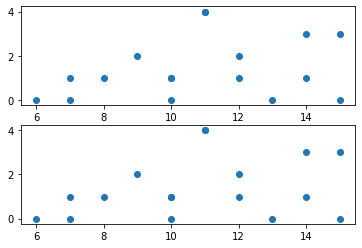

In [22]:
fig, ax = plt.subplots(2)
array_first = np.array(first_ped)
array = np.array(ped_list)
ax[0].scatter(x=array[:,1,0], y=array[:,1,1])
ax[1].scatter(x=array_first[:,1,0], y=array_first[:,1,1])    
#array_first, array

In [ ]:
ped_list[1][0]